In [19]:
import pandas as pd
import numpy as np

#### Read a csv file into a data frame

In [20]:
#sample frame
#csvf="/tmp/stream_sample.csv"
#prd frame
csvf="/tmp/stream_prd.csv"

In [21]:
df = pd.read_csv(csvf,header='infer')

In [22]:
df.shape  # we have 1 M rows, the size of the generated dataset

(1000000, 2)

#### convert epoch time in dateime, sort and set datetime column as data frame's index

In [23]:
#convert epoch to datetime (epoch timestamps are in seconds)
df['datetime'] = pd.to_datetime(df['epoch'],unit='s')

In [24]:
df.sort_values(by='datetime',inplace=True,ascending=True)
df.reset_index(inplace=True)
#df.tail(20)

In [25]:
dff=df.set_index('datetime')
dff.drop(['index','epoch'], axis=1,inplace=True)
#verify
#dff.tail(10)

#### resample dataframe to 1 min period and count unique values in each bucket

In [26]:
#getting the count of uniques per 1M
dfm1=dff.resample('1T').nunique()
dfm1.rename(columns={'uid': 'unique_ids'},inplace=True)
#verify
#dff.loc[dff.index>=pd.Timestamp('2016-07-11 13:40:00'),'uid'].nunique()

In [27]:
dfm1.shape # we just have 18 distinct minutes

(18, 1)

In [28]:
dfm1.head(5)

,unique_ids
datetime,
2016-07-11 13:39:00,21158
2016-07-11 13:40:00,47904
2016-07-11 13:41:00,43659
2016-07-11 13:42:00,51580
2016-07-11 13:43:00,36472


#### Visualize unique users values and its rolling mean

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

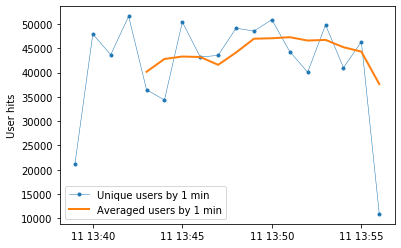

In [30]:
fig,ax = plt.subplots()
ax.plot(dfm1['unique_ids'], marker='.',linestyle='-', linewidth=0.5, label='Unique users by 1 min')
ax.plot(dfm1.rolling(5).mean(), linestyle='-', linewidth=2.0, label='Averaged users by 1 min')
ax.set_ylabel('User hits')
ax.legend();

##### The plot shows that a first and last value in a User Hits serie should be discarded as they do not gather fulll statistics per minute

In [31]:
#dff.resample('1H').nunique()